<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression Review Lab Solutions

_Authors: Alexander Combs (NYC)_

---

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [2]:
my_dict = {
    'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ],
    'Y': [.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]
}

my_dict

{'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Y': [0.5, 0.7, 0.8, 0.99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}

### Using that dictionary, create a pandas DataFrame and call it pre_df

In [3]:
pre_df = pd.DataFrame(my_dict)

### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [4]:
x_series = pre_df['X'] + 10
y_series = pre_df['Y'] + 3

new_data = pd.DataFrame(list(zip(x_series,y_series)), columns = ['X','Y'])
new_data

,X,Y
0,11,3.50
1,12,3.70
2,13,3.80
3,14,3.99
4,15,4.00
5,16,4.40
6,17,4.80
7,18,5.10
8,19,5.40
9,20,5.90


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [5]:
df = pd.concat([pre_df,new_data], ignore_index = True)
df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

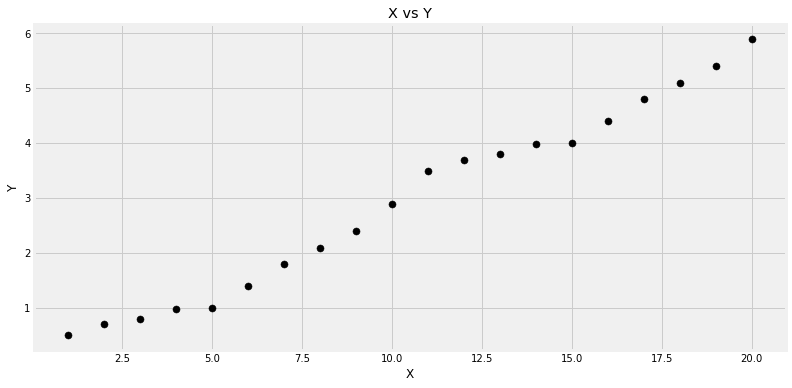

In [6]:
df.plot(x='X', y='Y', kind='scatter', color='black', \
        figsize=(12,6), title='X vs Y', s=50)

### Using sklear, fit an OLS regression to your data and print our the summary

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#from sklearn.model_selection import train_test_split

In [71]:

feature_cols = ['X']
X=df[feature_cols]
y=df['Y']

linreg = LinearRegression()
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=124,)

linreg.fit(X, y)

#list(zip(feature_cols, linreg.coef_))


LinearRegression()

## Using the model you fitted, answer the folowing questions:

### What is the R-squared for the model?

In [75]:
metrics.r2_score(linreg.predict(X), y)

0.9858413519476963

### What is the intercept?

In [76]:
linreg.intercept_

-0.08568421052631736

### What is the coeffecient?

In [77]:
linreg.coef_

array([0.28996992])

### Using the above, write the equation for our model

In [ ]:
# Y = -0.0857 + 0.29*X

### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [ ]:
#.29 * 20 - .0857

In [ ]:
#-.0857 + .29 * 21

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [64]:
prediction_data = np.array([[20], [21]])

In [79]:
print(linreg.predict(prediction_data))

[5.71371429 6.00368421]


### Get the MAE, MSE, RMSE by using the predictions for every X (y_hats) and the true y values

In [81]:
y_hat = linreg.predict(X)
print('MAE:', metrics.mean_absolute_error(y, y_hat))
print('MSE:', metrics.mean_squared_error(y, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_hat)))

MAE: 0.1623744360902257
MSE: 0.03958396992481204
RMSE: 0.19895720626509622


### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

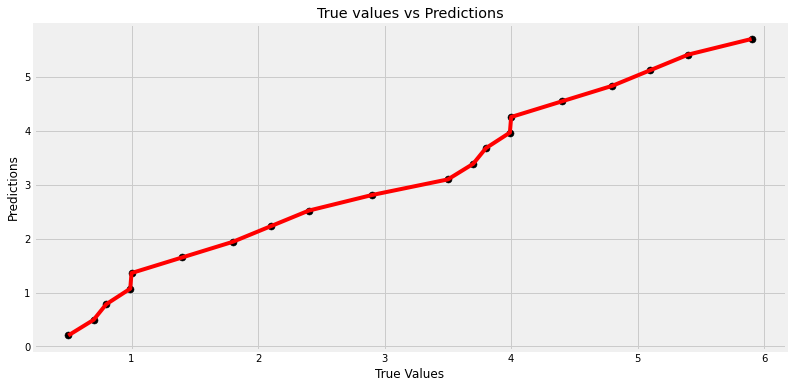

In [82]:
fig = plt.figure(figsize=(12, 6))

plt.scatter(y, y_hat, color = 'black', s=50)
plt.title("True values vs Predictions")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y, y_hat, color='r');

### Import PolynomialFeatures from sklearn. Then do the following:

- Instantiate a PolynomialFeatures object and save it as poly
- Documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Use degree=5 (Hint: If that gives you more than 6 columns, you forgot to remove something)
- Use fit_transform on X to create a numpy array of polynomial features
- Save that array as poly_feats
- Convert this array to a DataFrame and save it as poly_X
- Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)
- Save this joined index as pdf

In [83]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)

In [84]:
poly_feats = poly.fit_transform(df[['X']])
poly_X = pd.DataFrame(poly_feats)

In [85]:
pdf = pd.merge(df[['Y']],poly_X, right_index=True, left_index=True)
pdf

,Y,0,1,2,3,4,5
0,0.50,1.0,1.0,1.0,1.0,1.0,1.0
1,0.70,1.0,2.0,4.0,8.0,16.0,32.0
2,0.80,1.0,3.0,9.0,27.0,81.0,243.0
3,0.99,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.00,1.0,5.0,25.0,125.0,625.0,3125.0
5,1.40,1.0,6.0,36.0,216.0,1296.0,7776.0
6,1.80,1.0,7.0,49.0,343.0,2401.0,16807.0
7,2.10,1.0,8.0,64.0,512.0,4096.0,32768.0
8,2.40,1.0,9.0,81.0,729.0,6561.0,59049.0
9,2.90,1.0,10.0,100.0,1000.0,10000.0,100000.0


### Using sklearn as before, fit this new model and save it as poly_results

In [86]:
X = pdf[[0,1,2,3,4,5]]

y = pdf['Y']

linreg = LinearRegression()

linreg.fit(X, y)

LinearRegression()

### Print out the model's predictions and save them as poly_yhat

In [87]:
poly_yhat = linreg.predict(X)
poly_yhat

array([0.57452332, 0.62383537, 0.73329636, 0.9086668 , 1.14791445,
       1.44283096, 1.78064841, 2.14565598, 2.52081649, 2.88938301,
       3.23651549, 3.55089731, 3.82635191, 4.06345936, 4.27117298,
       4.46843594, 4.68579783, 4.96703129, 5.37074857, 5.97201818])

### Calculate the RMSE

In [88]:
np.sqrt(metrics.mean_squared_error(pdf['Y'], poly_yhat))

0.11747988141113579